# Exploring the RUEG Corpus
Goals

## Table of Contents
1. [Unigram Exploration]()

    A. [Loading in the Data]()
2. [Taking in Some Basic Stats]()
3. [Exloring with the POS]()

## Unigram Exploration

### Loading in the Data
Load in the pickle files created in [this](https://github.com/Data-Science-for-Linguists-2025/DEU-ENG-Mono-and-Billingual-Speakers/blob/main/LoadingRUEGData.ipynb) jupyter notebook, and poking around a bit

In [90]:
%pprint

Pretty printing has been turned ON


In [91]:
import pickle
import nltk
import sklearn
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 

In [92]:
with open ('debi_pos.pkl', 'rb') as file:
    DE_bi_pos = pickle.load(file)
with open ('demono_pos.pkl', 'rb') as file:
    DE_mono_pos = pickle.load(file)
with open ('enbi_pos.pkl', 'rb') as file:
    EN_bi_pos = pickle.load(file)
with open ('enmono_pos.pkl', 'rb') as file:
    EN_mono_pos = pickle.load(file)

In [93]:
with open ('debi_text.pkl', 'rb') as file:
    DE_bi_tokens = pickle.load(file)
with open ('demono_text.pkl', 'rb') as file:
    DE_mono_tokens = pickle.load(file)
with open ('enbi_text.pkl', 'rb') as file:
    EN_bi_tokens = pickle.load(file)
with open ('enmono_text.pkl', 'rb') as file:
    EN_mono_tokens = pickle.load(file)

In [94]:
print(len(DE_bi_pos))
print(len(DE_mono_pos))
print(len(EN_bi_pos))
print(len(EN_mono_pos))

print(len(DE_bi_tokens))
print(len(DE_mono_tokens))
print(len(EN_bi_tokens))
print(len(EN_mono_tokens))

## they are the same- good!

4773
1761
4385
621
586
256
444
64


In [95]:
DE_bi_pos[:10]

[('und', 'CCONJ'),
 ('die', 'PRON'),
 ('haben', 'AUX'),
 ('die', 'DET'),
 ('Polizei', 'NOUN'),
 ('äh', 'INTJ'),
 ('angerufen', 'VERB'),
 ('DEbi24FT', 'PROPN'),
 ('und', 'CCONJ'),
 ('ist', 'AUX')]

In [96]:
DE_bi_tokens[:10]

[[('und', 'CCONJ'),
  ('die', 'PRON'),
  ('haben', 'AUX'),
  ('die', 'DET'),
  ('Polizei', 'NOUN'),
  ('äh', 'INTJ'),
  ('angerufen', 'VERB')],
 [('DEbi24FT', 'PROPN')],
 [('und', 'CCONJ'),
  ('ist', 'AUX'),
  ('ins', 'ADP'),
  ('erste', 'ADJ'),
  ('Auto', 'NOUN'),
  ('reingefahren', 'VERB')],
 [('und', 'CCONJ'),
  ('das', 'DET'),
  ('vordere', 'ADJ'),
  ('Auto', 'NOUN'),
  ('muss', 'AUX'),
  ('wegen', 'ADP'),
  ('des', 'DET'),
  ('rollenden', 'ADJ'),
  ('Balls', 'NOUN'),
  ('und', 'CCONJ'),
  ('dem', 'DET'),
  ('Hund', 'NOUN'),
  ('so', 'ADV'),
  ('stark', 'ADJ'),
  ('bremsen', 'VERB'),
  (',', 'PUNCT'),
  ('dass', 'CCONJ'),
  ('das', 'DET'),
  ('hintere', 'ADJ'),
  ('Auto', 'NOUN'),
  ('auffährt', 'VERB'),
  ('und', 'CCONJ'),
  ('einen', 'DET'),
  ('Unfall', 'NOUN'),
  ('verursacht', 'VERB'),
  ('.', 'PUNCT')],
 [('Der', 'DET'),
  ('Man', 'NOUN'),
  ('rief', 'VERB'),
  ('die', 'DET'),
  ('Polizei', 'NOUN'),
  ('an', 'ADV'),
  ('.', 'PUNCT')],
 [('Ich', 'PRON'),
  ('wurde', 'AUX'),
  

So, unfortunately, after investigating some POS tags, there are some non-UPOS tags included in the German sets. This is likely from some kind of incorrect parsing from the stanza parsing, or incorrectly marked in the actual text (it was automatic POS tagging, not by hand with exMaralda)

For out purposes, I decided to just exlude these instances from the data here. They will not be helpful and there really isn't another solution here.

In [97]:
DE_bi_pos = [x for x in DE_bi_pos if x[1] not in ['NE', '_', '$.', 'X']]
debi_postags = [x[1] for x in DE_bi_pos]
debitagfd = nltk.FreqDist(debi_postags)
print(debitagfd.most_common())

[('NOUN', 702), ('DET', 618), ('VERB', 558), ('ADV', 550), ('PRON', 448), ('AUX', 354), ('CCONJ', 341), ('ADP', 292), ('ADJ', 291), ('PUNCT', 251), ('INTJ', 175), ('PROPN', 51), ('SYM', 29), ('PART', 23), ('NUM', 22), ('SCONJ', 7)]


In [98]:
DE_mono_pos = [x for x in DE_mono_pos if x[1] not in ['PPER', 'VAFIN', 'KON', 'PIAT', 'NN']]
demono_postags = [x[1] for x in DE_mono_pos]
demonotagfd = nltk.FreqDist(demono_postags)
print(demonotagfd.most_common())

[('NOUN', 251), ('DET', 210), ('ADV', 207), ('VERB', 189), ('PRON', 176), ('AUX', 127), ('CCONJ', 119), ('ADP', 115), ('ADJ', 113), ('PUNCT', 100), ('INTJ', 92), ('SYM', 20), ('PROPN', 17), ('NUM', 8), ('PART', 7), ('SCONJ', 3)]


In [99]:
EN_bi_pos = [x for x in EN_bi_pos if x[1] != '_']
enbi_postags = [x[1] for x in EN_bi_pos]
enbitagfd = nltk.FreqDist(enbi_postags)
print(enbitagfd.most_common())

[('NOUN', 685), ('VERB', 675), ('DET', 673), ('ADP', 420), ('PROPN', 330), ('CCONJ', 268), ('AUX', 251), ('ADV', 234), ('ADJ', 212), ('PUNCT', 200), ('PART', 119), ('SCONJ', 112), ('PRON', 91), ('INTJ', 75), ('NUM', 36)]


In [100]:
enmono_postags = [x[1] for x in EN_mono_pos]
enmonotagfd = nltk.FreqDist(enmono_postags)
print(enmonotagfd.most_common())
len(set(enmono_postags))

[('DET', 102), ('VERB', 99), ('NOUN', 92), ('ADP', 61), ('CCONJ', 44), ('PROPN', 43), ('ADJ', 34), ('AUX', 33), ('ADV', 31), ('PUNCT', 21), ('PART', 19), ('PRON', 17), ('SCONJ', 17), ('INTJ', 7), ('NUM', 1)]


15

These are a little harder to compare, because we know that the sizes of the texts are pretty different. Another thing to consider is similar to the issue with TTR (it is hard to compare Type to Token Ratio when text sizes are vastly different becasue stop words will have a larger proportion in longer text). If these text sizes are so different (mostly considering the English Monolingual) it may be harder to compare. I will do the best I can, but this is crucial to keep in mind whenever comparing the four partitions.

That being said, It's still fair to say that nouns, determinersa and verbs are in the top among all sets. What is interesting is the greater use of adverbs in German speakers comapred to more use of adpositions in English. At this point, it is hard to see the similarites of Bilingual speakers in comaprison to monolingual speakers, and minute differences may be difficult to see with the human eye and will require some kind of machine learning.

In [101]:
debiposfd = nltk.FreqDist(DE_bi_pos)
print(debiposfd.most_common(20))

[(('und', 'CCONJ'), 221), (('.', 'PUNCT'), 175), (('die', 'DET'), 155), (('der', 'DET'), 120), (('Polizei', 'NOUN'), 118), (('Auto', 'NOUN'), 94), (('dann', 'ADV'), 81), (('ist', 'AUX'), 75), (('äh', 'INTJ'), 60), (('das', 'DET'), 60), (('es', 'PRON'), 59), ((',', 'PUNCT'), 54), (('hat', 'AUX'), 54), (('ich', 'PRON'), 52), (('dem', 'DET'), 49), (('ja', 'INTJ'), 47), (('haben', 'AUX'), 44), (('den', 'DET'), 43), (('war', 'AUX'), 41), (('ein', 'DET'), 38)]


In [102]:
demonoposfd = nltk.FreqDist(DE_mono_pos)
print(demonoposfd.most_common(20))

[(('und', 'CCONJ'), 76), (('.', 'PUNCT'), 66), (('die', 'DET'), 37), (('der', 'DET'), 35), (('ist', 'AUX'), 31), (('dann', 'ADV'), 29), (('dem', 'DET'), 29), (('den', 'DET'), 27), (('ja', 'INTJ'), 26), (('Auto', 'NOUN'), 25), (('ich', 'PRON'), 25), ((',', 'PUNCT'), 24), (('war', 'AUX'), 23), (('das', 'PRON'), 23), (('mit', 'ADP'), 22), (('Polizei', 'NOUN'), 19), (('nicht', 'INTJ'), 19), (('es', 'PRON'), 18), (('auf', 'ADP'), 18), (('das', 'DET'), 17)]


In [103]:
enbiposfd = nltk.FreqDist(EN_bi_pos)
print(enbiposfd.most_common(20))

[(('the', 'DET'), 428), (('and', 'CCONJ'), 220), (('.', 'PUNCT'), 158), (('car', 'NOUN'), 144), (('to', 'PART'), 89), (('was', 'AUX'), 87), (('of', 'ADP'), 83), (('it', 'PROPN'), 78), (('called', 'VERB'), 72), (('they', 'PROPN'), 51), (('in', 'ADP'), 50), (('then', 'ADV'), 50), (('him', 'PROPN'), 50), (('I', 'PROPN'), 45), (('911', 'NOUN'), 45), (('behind', 'ADP'), 45), (('police', 'NOUN'), 44), (('hit', 'VERB'), 40), (('to', 'ADP'), 40), (('a', 'DET'), 39)]


In [104]:
enmonoposfd = nltk.FreqDist(EN_mono_pos)
print(enmonoposfd.most_common(20))

[(('the', 'DET'), 62), (('and', 'CCONJ'), 39), (('car', 'NOUN'), 35), (('.', 'PUNCT'), 19), (('it', 'PROPN'), 17), (('was', 'AUX'), 16), (('to', 'PART'), 13), (('other', 'ADJ'), 11), (('one', 'PRON'), 9), (('of', 'ADP'), 9), (('rear-ended', 'VERB'), 9), (('him', 'PROPN'), 9), (('hit', 'VERB'), 9), (('into', 'ADP'), 8), (('then', 'ADV'), 8), (('they', 'PROPN'), 8), (('behind', 'ADP'), 8), (('stopped', 'VERB'), 7), (('that', 'DET'), 7), (('in', 'ADP'), 7)]


#### What are we seeing here
Let me translate what exactly is happening here with the langauges. First, it's important to recognize that some of these recording are coming from a situation in which the participants were asked to describe a video they saw about a car crash as if they had witnessed the car crash which is why words like 'Polizei' (English: Police) and 'Auto' and 'car' are common.

Secondly, when looking at the distribution of stop words, it is a little different. For one, the most common word in both German texts is 'und' (English: and) while the most common word in English is 'the'. This is likely because German has several different words for 'the' (der, die, das, den, dem, des) so the distribution is spread across these several words. The bilingual sets are pretty comparable becasue they have similar sizes, and when looking at 'und' and 'and', they have pretty similar usuage.

Additionally, some of these texts are transcriptions of *spoken* audio, so the punctuation is a little tricky to analyze and not going to be of a whole lot of importance to this anyway.

### Combing the Bilingual v Monolingual
Let's combine the bilingual and monolingual data and just look at pos to see if that will show any greater differences.

In [105]:
bilingual_uni_pos = EN_bi_pos + DE_bi_pos
print(len(bilingual_uni_pos))

monolingual_uni_pos = EN_mono_pos + DE_mono_pos
print(len(monolingual_uni_pos))

## big size discrepency to keep in mind

9093
2375


In [106]:
biuni_postags = [x[1] for x in bilingual_uni_pos]
biuni_postagsfd = nltk.FreqDist(biuni_postags)
biuni_postagsfd.most_common(20)

[('NOUN', 1387),
 ('DET', 1291),
 ('VERB', 1233),
 ('ADV', 784),
 ('ADP', 712),
 ('CCONJ', 609),
 ('AUX', 605),
 ('PRON', 539),
 ('ADJ', 503),
 ('PUNCT', 451),
 ('PROPN', 381),
 ('INTJ', 250),
 ('PART', 142),
 ('SCONJ', 119),
 ('NUM', 58),
 ('SYM', 29)]

In [107]:
monouni_postags = [x[1] for x in monolingual_uni_pos]
monouni_postagsfd = nltk.FreqDist(monouni_postags)
monouni_postagsfd.most_common(20)

## with just the POS, we can compare how the first four groups are similar,
## however pronoun usuage is clearly different and greater in the monolingual
## speakers, but everything else is nearly identical- very cool!!

[('NOUN', 343),
 ('DET', 312),
 ('VERB', 288),
 ('ADV', 238),
 ('PRON', 193),
 ('ADP', 176),
 ('CCONJ', 163),
 ('AUX', 160),
 ('ADJ', 147),
 ('PUNCT', 121),
 ('INTJ', 99),
 ('PROPN', 60),
 ('PART', 26),
 ('SCONJ', 20),
 ('SYM', 20),
 ('NUM', 9)]

In [108]:
## add in machine learning for giggles because I know it's not going to be good at this stage

## Bigram Exploration
Unigram exploration is interesting, but it can really only do so much for us. What is (hopefully) more telling, will be the bigram and possibly trigram trends

#### Loading in the Data + poking around

In [109]:
with open ('bigram_debi_pos.pkl', 'rb') as file:
    DE_bi_bigram_pos = pickle.load(file)
with open ('bigram_demono_pos.pkl', 'rb') as file:
    DE_mono_bigram_pos = pickle.load(file)
with open ('bigram_enbi_pos.pkl', 'rb') as file:
    EN_bi_bigram_pos = pickle.load(file)
with open ('bigram_enmono_pos.pkl', 'rb') as file:
    EN_mono_bigram_pos = pickle.load(file)

In [110]:
DE_bi_bigram_pos[:10]

[(('und', 'CCONJ'), ('die', 'PRON')),
 (('die', 'PRON'), ('haben', 'AUX')),
 (('haben', 'AUX'), ('die', 'DET')),
 (('die', 'DET'), ('Polizei', 'NOUN')),
 (('Polizei', 'NOUN'), ('äh', 'INTJ')),
 (('äh', 'INTJ'), ('angerufen', 'VERB')),
 (('und', 'CCONJ'), ('ist', 'AUX')),
 (('ist', 'AUX'), ('ins', 'ADP')),
 (('ins', 'ADP'), ('erste', 'ADJ')),
 (('erste', 'ADJ'), ('Auto', 'NOUN'))]

In [111]:
len(DE_bi_bigram_pos)

4187

In [112]:
DE_bi_bigram_pos = [(x,y) for (x,y) in DE_bi_bigram_pos if (x[1] not in ['NE', '_', '$.', 'X']) and (y[1] not in ['NE', '_', '$.', 'X'])]

In [113]:
len(DE_bi_bigram_pos)
## yay it worked!

4130

In [114]:
debi_bipostags = [(x[1], y[1]) for (x, y) in DE_bi_bigram_pos]

In [115]:
debi_bipostags[:10]

[('CCONJ', 'PRON'),
 ('PRON', 'AUX'),
 ('AUX', 'DET'),
 ('DET', 'NOUN'),
 ('NOUN', 'INTJ'),
 ('INTJ', 'VERB'),
 ('CCONJ', 'AUX'),
 ('AUX', 'ADP'),
 ('ADP', 'ADJ'),
 ('ADJ', 'NOUN')]

In [116]:
debi_bitoks = [(x[0], y[0]) for (x, y) in DE_bi_bigram_pos]
debi_bitoks[:10]

[('und', 'die'),
 ('die', 'haben'),
 ('haben', 'die'),
 ('die', 'Polizei'),
 ('Polizei', 'äh'),
 ('äh', 'angerufen'),
 ('und', 'ist'),
 ('ist', 'ins'),
 ('ins', 'erste'),
 ('erste', 'Auto')]

In [117]:
debibitokfd = nltk.FreqDist(debi_bitoks)
debibitokfd.most_common(20)

[(('die', 'Polizei'), 108),
 (('und', 'der'), 34),
 (('Polizei', 'gerufen'), 30),
 (('der', 'Mann'), 20),
 (('Polizei', 'angerufen'), 20),
 (('und', 'dann'), 17),
 (('das', 'war'), 17),
 (('Polizei', '.'), 16),
 (('mit', 'dem'), 16),
 (('und', 'die'), 15),
 (('und', 'ja'), 15),
 (('und', 'das'), 13),
 (('ist', 'dann'), 13),
 (('war', 'es'), 13),
 (('der', 'Frau'), 12),
 (('und', 'äh'), 12),
 (('dann', 'die'), 12),
 (('gerufen', '.'), 11),
 (('das', 'Auto'), 11),
 (('blauen', 'Auto'), 11)]

In [118]:
DE_mono_bigram_pos = [(x,y) for (x,y) in DE_mono_bigram_pos if (x[1] not in ['PPER', 'VAFIN', 'KON', 'PIAT', 'NN']) and (y[1] not in ['PPER', 'VAFIN', 'KON', 'PIAT', 'NN'])]
EN_bi_bigram_pos = [(x,y) for (x,y) in EN_bi_bigram_pos if (x[1] != '_') and (y[1] != '_')]
EN_mono_bigram_pos = [(x,y) for (x,y) in EN_mono_bigram_pos]
## pos tags extraction
demono_bipostags = [(x[1], y[1]) for (x, y) in DE_mono_bigram_pos]
enbi_bipostags = [(x[1], y[1]) for (x, y) in EN_bi_bigram_pos]
enmono_bipostags = [(x[1], y[1]) for (x, y) in EN_mono_bigram_pos]
## text extraction
demono_bitoks = [(x[0], y[0]) for (x, y) in DE_mono_bigram_pos]
enbi_bitoks = [(x[0], y[0]) for (x, y) in EN_bi_bigram_pos]
enmono_bitoks = [(x[0], y[0]) for (x, y) in EN_mono_bigram_pos]
## printing len of each bigram pos
print(len(DE_bi_bigram_pos))
print(len(DE_mono_bigram_pos))
print(len(EN_bi_bigram_pos))
print(len(EN_mono_bigram_pos))

4130
1499
3938
557


In [119]:
debibiposfd = nltk.FreqDist(DE_bi_bigram_pos)
debibiposfd.most_common(20)
## lot's of very topical words, given the prompt the participants were given

[((('die', 'DET'), ('Polizei', 'NOUN')), 108),
 ((('und', 'CCONJ'), ('der', 'DET')), 31),
 ((('Polizei', 'NOUN'), ('gerufen', 'VERB')), 30),
 ((('der', 'DET'), ('Mann', 'NOUN')), 20),
 ((('Polizei', 'NOUN'), ('angerufen', 'VERB')), 20),
 ((('und', 'CCONJ'), ('dann', 'ADV')), 17),
 ((('Polizei', 'NOUN'), ('.', 'PUNCT')), 16),
 ((('mit', 'ADP'), ('dem', 'DET')), 16),
 ((('das', 'PRON'), ('war', 'AUX')), 16),
 ((('und', 'CCONJ'), ('ja', 'INTJ')), 15),
 ((('ist', 'AUX'), ('dann', 'ADV')), 13),
 ((('der', 'DET'), ('Frau', 'NOUN')), 12),
 ((('war', 'AUX'), ('es', 'PRON')), 12),
 ((('und', 'CCONJ'), ('die', 'DET')), 12),
 ((('gerufen', 'VERB'), ('.', 'PUNCT')), 11),
 ((('das', 'DET'), ('Auto', 'NOUN')), 11),
 ((('dann', 'ADV'), ('die', 'DET')), 11),
 ((('blauen', 'ADJ'), ('Auto', 'NOUN')), 11),
 ((('Auto', 'NOUN'), ('reingefahren', 'VERB')), 10),
 ((('in', 'ADP'), ('das', 'DET')), 10)]

In [120]:
debibipostagfd = nltk.FreqDist(debi_bipostags)
debibipostagfd.most_common(20)
## det noun makes a lot of sense, as does noun verb to be the most common

[(('DET', 'NOUN'), 439),
 (('NOUN', 'VERB'), 236),
 (('ADJ', 'NOUN'), 154),
 (('ADP', 'DET'), 149),
 (('DET', 'ADJ'), 131),
 (('VERB', 'PUNCT'), 112),
 (('AUX', 'ADV'), 100),
 (('ADV', 'VERB'), 97),
 (('PRON', 'ADV'), 92),
 (('ADV', 'ADV'), 91),
 (('PRON', 'VERB'), 90),
 (('CCONJ', 'DET'), 88),
 (('ADV', 'DET'), 85),
 (('CCONJ', 'PRON'), 84),
 (('PRON', 'AUX'), 77),
 (('NOUN', 'AUX'), 75),
 (('AUX', 'PRON'), 75),
 (('VERB', 'AUX'), 74),
 (('NOUN', 'ADP'), 68),
 (('NOUN', 'ADV'), 62)]

In [121]:
demonobitoksfd = nltk.FreqDist(demono_bitoks)
enbibitoksfd = nltk.FreqDist(enbi_bitoks)
enmonobitoksfd = nltk.FreqDist(enmono_bitoks)
biposfds = [debibiposfd, demonobitoksfd, enbibitoksfd, enmonobitoksfd]
for x in biposfds:
    print(x.most_common(20))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

[((('die', 'DET'), ('Polizei', 'NOUN')), 108), ((('und', 'CCONJ'), ('der', 'DET')), 31), ((('Polizei', 'NOUN'), ('gerufen', 'VERB')), 30), ((('der', 'DET'), ('Mann', 'NOUN')), 20), ((('Polizei', 'NOUN'), ('angerufen', 'VERB')), 20), ((('und', 'CCONJ'), ('dann', 'ADV')), 17), ((('Polizei', 'NOUN'), ('.', 'PUNCT')), 16), ((('mit', 'ADP'), ('dem', 'DET')), 16), ((('das', 'PRON'), ('war', 'AUX')), 16), ((('und', 'CCONJ'), ('ja', 'INTJ')), 15), ((('ist', 'AUX'), ('dann', 'ADV')), 13), ((('der', 'DET'), ('Frau', 'NOUN')), 12), ((('war', 'AUX'), ('es', 'PRON')), 12), ((('und', 'CCONJ'), ('die', 'DET')), 12), ((('gerufen', 'VERB'), ('.', 'PUNCT')), 11), ((('das', 'DET'), ('Auto', 'NOUN')), 11), ((('dann', 'ADV'), ('die', 'DET')), 11), ((('blauen', 'ADJ'), ('Auto', 'NOUN')), 11), ((('Auto', 'NOUN'), ('reingefahren', 'VERB')), 10), ((('in', 'ADP'), ('das', 'DET')), 10)]
[(('die', 'Polizei'), 19), (('mit', 'dem'), 13), (('das', 'war'), 9), (('ja', 'das'), 8), (('das', 'Auto'), 7), (('der', 'Frau'

In [122]:
demonobiposfd = nltk.FreqDist(DE_mono_bigram_pos)
enbibiposfd = nltk.FreqDist(EN_bi_bigram_pos)
enmonobiposfd = nltk.FreqDist(EN_mono_bigram_pos)
biposfds = [debibiposfd, demonobiposfd, enbibiposfd, enmonobiposfd]
for x in biposfds:
    print(x.most_common(20))
        
## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

[((('die', 'DET'), ('Polizei', 'NOUN')), 108), ((('und', 'CCONJ'), ('der', 'DET')), 31), ((('Polizei', 'NOUN'), ('gerufen', 'VERB')), 30), ((('der', 'DET'), ('Mann', 'NOUN')), 20), ((('Polizei', 'NOUN'), ('angerufen', 'VERB')), 20), ((('und', 'CCONJ'), ('dann', 'ADV')), 17), ((('Polizei', 'NOUN'), ('.', 'PUNCT')), 16), ((('mit', 'ADP'), ('dem', 'DET')), 16), ((('das', 'PRON'), ('war', 'AUX')), 16), ((('und', 'CCONJ'), ('ja', 'INTJ')), 15), ((('ist', 'AUX'), ('dann', 'ADV')), 13), ((('der', 'DET'), ('Frau', 'NOUN')), 12), ((('war', 'AUX'), ('es', 'PRON')), 12), ((('und', 'CCONJ'), ('die', 'DET')), 12), ((('gerufen', 'VERB'), ('.', 'PUNCT')), 11), ((('das', 'DET'), ('Auto', 'NOUN')), 11), ((('dann', 'ADV'), ('die', 'DET')), 11), ((('blauen', 'ADJ'), ('Auto', 'NOUN')), 11), ((('Auto', 'NOUN'), ('reingefahren', 'VERB')), 10), ((('in', 'ADP'), ('das', 'DET')), 10)]
[((('die', 'DET'), ('Polizei', 'NOUN')), 19), ((('mit', 'ADP'), ('dem', 'DET')), 12), ((('das', 'PRON'), ('war', 'AUX')), 9), (

In [123]:
demonobipostagfd = nltk.FreqDist(demono_bipostags)
enbibipostagfd = nltk.FreqDist(enbi_bipostags)
enmonobipostagfd = nltk.FreqDist(enmono_bipostags)
bipostagfds = [debibipostagfd, demonobipostagfd, enbibipostagfd, enmonobipostagfd]
for x in bipostagfds:
    print(x.most_common(20))
    
## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

[(('DET', 'NOUN'), 439), (('NOUN', 'VERB'), 236), (('ADJ', 'NOUN'), 154), (('ADP', 'DET'), 149), (('DET', 'ADJ'), 131), (('VERB', 'PUNCT'), 112), (('AUX', 'ADV'), 100), (('ADV', 'VERB'), 97), (('PRON', 'ADV'), 92), (('ADV', 'ADV'), 91), (('PRON', 'VERB'), 90), (('CCONJ', 'DET'), 88), (('ADV', 'DET'), 85), (('CCONJ', 'PRON'), 84), (('PRON', 'AUX'), 77), (('NOUN', 'AUX'), 75), (('AUX', 'PRON'), 75), (('VERB', 'AUX'), 74), (('NOUN', 'ADP'), 68), (('NOUN', 'ADV'), 62)]
[(('DET', 'NOUN'), 146), (('NOUN', 'VERB'), 70), (('ADP', 'DET'), 68), (('ADJ', 'NOUN'), 54), (('DET', 'ADJ'), 47), (('VERB', 'PUNCT'), 40), (('ADV', 'ADV'), 39), (('PRON', 'ADV'), 36), (('AUX', 'PRON'), 35), (('NOUN', 'ADP'), 34), (('ADV', 'VERB'), 34), (('PRON', 'AUX'), 34), (('PRON', 'VERB'), 32), (('CCONJ', 'DET'), 28), (('NOUN', 'ADV'), 27), (('ADV', 'DET'), 27), (('VERB', 'AUX'), 25), (('VERB', 'PRON'), 24), (('CCONJ', 'PRON'), 24), (('AUX', 'ADV'), 24)]
[(('DET', 'NOUN'), 407), (('ADP', 'DET'), 209), (('VERB', 'DET'),

In [124]:
debibipostagcfd = nltk.ConditionalFreqDist(debi_bipostags)
demonobipostagcfd = nltk.ConditionalFreqDist(demono_bipostags)
enbibipostagcfd = nltk.ConditionalFreqDist(enbi_bipostags)
enmonobipostagcfd = nltk.ConditionalFreqDist(enmono_bipostags)
bipostagcfds = [debibipostagcfd, demonobipostagcfd, enbibipostagcfd, enmonobipostagcfd]

print('Noun, Verb')
for x in bipostagcfds:
    print(x['NOUN'].freq('VERB'))
print('Adjective, Noun')
for x in bipostagcfds:
    print(x['ADJ'].freq('NOUN'))
print('Adjective, Adjective')
for x in bipostagcfds:
    print(x['ADJ'].freq('ADJ'))
print('Adverb, Verb')
for x in bipostagcfds:
    print(x['ADV'].freq('VERB'))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

Noun, Verb
0.36363636363636365
0.319634703196347
0.19830508474576272
0.2077922077922078
Adjective, Noun
0.5661764705882353
0.5294117647058824
0.7150837988826816
0.5
Adjective, Adjective
0.029411764705882353
0.049019607843137254
0.00558659217877095
0.0
Adverb, Verb
0.19019607843137254
0.17616580310880828
0.2757009345794392
0.3793103448275862


#### Again, let's pause and look what's happening
This is a lot of data to take in, but me break down what's we're seeing with these sets of bigrams. Of course, the most popular token bigrams are topical things like 'Die Polizei' (english: 'the police') or 'dem Ball' (english: 'the ball') or 'car behind' but there are also more function word combinations like 'and the' or 'of the' or 'mit dem' (english: 'with the') or 'und der' (english: 'and the'). A lot of these make some sense. 

As for the most popular being 'die Polizei' in German, I have some guesses. Firstly, as I stated before, 'the' in German can take many forms, so while it is very popular in english to have 'and the', in German this could be 'und die/der/das/dem/den ect' which 'waters down' so-to-say the frequency of the 'the' token in German. Because these were made-up police reports, however, 'die Polizei' (nom.) was likely used in the nominative case more frequently as it was the police doing something in these scenerios, so it doesn't suffer from this 'watering down' issue other determiners may face 
- like 'Ball' which may have been used in the accusative or dative case acting as either the patient or theme in a lot of these sentences

What is interesting, is that it is looking like the Bilinguals overall used more content bigrams more frequently/consistenly as opposed to stopwords, which may make sense as grammatical rules/stopwords change a lot more in different languages, have different meanings to speakers, ect where content words have more 'reliable' and 'consistent' translations 
- ie 'Apfel' and 'Apple' are going to mean the same thing to both speakers, but where English has one words: 'because', Germans have more like 'weil', 'da', 'dann', where 'dann' can be used like 'because' but it can also be used like 'then' (as in the time indicator: x happened and *then* x happened)

As for the part of speech, it's harder to see bilingual/monolingual similarities with the naked eye, which is why I implinted the condtional frequency distribution to get normalized results for targeted conditions. However, I believe we can help normalize this a little more (just because the count difference between these groups is sso great) so I'm going to randomly sample before creating a conditional frequency ditribution generator object.


In [125]:
print(len(debi_bipostags))
print(len(demono_bipostags))
print(len(enbi_bipostags))
print(len(enmono_bipostags))

4130
1499
3938
557


In [126]:
## let's random sample just 15000
debi_bipostags15k = random.sample(debi_bipostags, 15000)
demono_bipostags15k = random.sample(demono_bipostags, 15000)
enbi_bipostags15k = random.sample(enbi_bipostags, 15000)
enmono_bipostags15k = random.sample(enmono_bipostags, 15000)

ValueError: Sample larger than population or is negative

In [ ]:
debibipostag15kcfd = nltk.ConditionalFreqDist(debi_bipostags15k)
demonobipostag15kcfd = nltk.ConditionalFreqDist(demono_bipostags15k)
enbibipostag15kcfd = nltk.ConditionalFreqDist(enbi_bipostags15k)
enmonobipostag15kcfd = nltk.ConditionalFreqDist(enmono_bipostags15k)
bipostag15kcfds = [debibipostag15kcfd, demonobipostag15kcfd, enbibipostag15kcfd, enmonobipostag15kcfd]

In [ ]:
print('Noun, Verb')
for x in bipostag15kcfds:
    print(x['NOUN'].freq('VERB'))
print('Adjective, Noun')
for x in bipostag15kcfds:
    print(x['ADJ'].freq('NOUN'))
print('Adjective, Adjective')
for x in bipostag15kcfds:
    print(x['ADJ'].freq('ADJ'))
print('Adverb, Verb')
for x in bipostag15kcfds:
    print(x['ADV'].freq('VERB'))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

Noun, Verb
0.34778875053671104
0.30954587581093607
0.21061946902654868
0.1466731423020884
Adjective, Noun
0.5770308123249299
0.4814432989690722
0.7443181818181818
0.4254278728606357
Adjective, Adjective
0.026143790849673203
0.020618556701030927
0.004261363636363636
0.0
Adverb, Verb
0.2203125
0.1933989577301679
0.2644927536231884
0.38144329896907214


In [ ]:
print('Adposition, Noun')
for x in bipostag15kcfds:
    print(x['ADP'].freq('NOUN'))
print('Adposition, Determiner')
for x in bipostag15kcfds:
    print(x['ADP'].freq('DET'))
print('Verb, Noun')
for x in bipostag15kcfds:
    print(x['VERB'].freq('NOUN'))
print('Verb, Determiner')
for x in bipostag15kcfds:
    print(x['VERB'].freq('DET'))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

Adposition, Noun
0.13984674329501914
0.15967885816235505
0.041079092581238506
0.0
Adposition, Determiner
0.5306513409961686
0.6369313113291704
0.49908031882280807
0.44034278180619646
Verb, Noun
0.0
0.006093432633716994
0.09483843894250944
0.06702523789822093
Verb, Determiner
0.13076437144662034
0.08327691266079891
0.26856903063365506
0.2743069921390153


#### Analyzing the Bigram CFD
- Condition 1: Noun, Verb
    - This is the one of the most basic ways to structure a sentence in both English and German (although German does have some more flexible word order), so I was using this to test if maybe bilingual speakers would be influenced by their other languages and use more basic or more free grammatical structures
    - Result: The numbers inside each language are pretty similar, but each bilingual partition has more use of this structure than it's monolingual counterpart. Again, and I can never emphasize this enough, both monolingual sections are smaller than their bilingual counterparts and with bigrams, this problem only gets enhanced as it's exponential growth. Since this is a very common sentence formation, it would make sense that in larger texts this takes up more of the bigrams (similar to the TTR caveat)
- Condition 2: Adjective, Noun
    - This was mostly just to compare with the next test. 
- Condition 3: Adjective, Adjective
    - This test was to compare the use of adjectives string in sentences. I wanted to comapre it with the use of (adjectives, noun) phrases because the most common places to use an adjectives are before nouns and before adjectives. 
    - Results: It does seem that the groups that used adjectives more in front of nouns, used them less in front of other adjectives, just meaning that in general these groups used less multi-adjective phrases. Although there does appear to be a potential statistical difference between (adjective, noun) usage for bilingual and monolingual speakers, that is certainly not present in the (adjective, adjective) data.
- Condition 4: Adverb, Verb
    - 
- Condition 5: Adposition, Noun
    - 
- Condition 6: Adposition, Determiner
    - 
- Condition 7: Verb, Determiner
    - 

Note to self: implement statistic testing into the ones i believe to have stronger correlation

### Testing A Model on Bigrams

## Trigram Exploration

#### Loading in the Data

In [ ]:
with open ('trigram_debi_pos.pkl', 'rb') as file:
    DE_bi_trigram_pos = pickle.load(file)
with open ('trigram_demono_pos.pkl', 'rb') as file:
    DE_mono_trigram_pos = pickle.load(file)
with open ('trigram_enbi_pos.pkl', 'rb') as file:
    EN_bi_trigram_pos = pickle.load(file)
with open ('trigram_enmono_pos.pkl', 'rb') as file:
    EN_mono_trigram_pos = pickle.load(file)

In [ ]:
print(len(DE_bi_trigram_pos))
print(len(DE_mono_trigram_pos))
print(len(EN_bi_trigram_pos))
print(len(EN_mono_trigram_pos))
## and the size differences continue to become exacerbated :/

1044808
173028
805452
16001


In [ ]:
DE_bi_trigram_pos[:5]

[(('und', 'CCONJ'), ('die', 'PRON'), ('haben', 'AUX')), (('die', 'PRON'), ('haben', 'AUX'), ('die', 'DET')), (('haben', 'AUX'), ('die', 'DET'), ('Polizei', 'NOUN')), (('die', 'DET'), ('Polizei', 'NOUN'), ('äh', 'INTJ')), (('Polizei', 'NOUN'), ('äh', 'INTJ'), ('angerufen', 'VERB'))]

In [ ]:
## cleaning the data again
DE_bi_trigram_pos = [(x,y,z) for (x,y,z) in DE_bi_trigram_pos if (x[1] not in ['NE', '_', '$.', 'X']) and (y[1] not in ['NE', '_', '$.', 'X']) and (z[1] not in ['NE', '_', '$.', 'X'])]
DE_mono_trigram_pos = [(x,y,z) for (x,y,z) in DE_mono_trigram_pos if (x[1] not in ['PPER', 'VAFIN', 'KON', 'PIAT', 'NN']) and (y[1] not in ['PPER', 'VAFIN', 'KON', 'PIAT', 'NN'])and (z[1] not in ['PPER', 'VAFIN', 'KON', 'PIAT', 'NN'])]
EN_bi_trigram_pos = [(x,y,z) for (x,y,z) in EN_bi_trigram_pos if (x[1] != '_') and (y[1] != '_') and (z[1] != '_')]

In [ ]:
print(len(DE_bi_trigram_pos))
print(len(DE_mono_trigram_pos))
print(len(EN_bi_trigram_pos))
print(len(EN_mono_trigram_pos))

1032122
172658
805348
16001


In [ ]:
## pos tags extraction
debi_tripostags = [(x[1], y[1], z[1]) for (x, y, z) in DE_bi_trigram_pos]
demono_tripostags = [(x[1], y[1], z[1]) for (x, y, z) in  DE_mono_trigram_pos]
enbi_tripostags = [(x[1], y[1], z[1]) for (x, y, z) in EN_bi_trigram_pos]
enmono_tripostags = [(x[1], y[1], z[1]) for (x, y, z) in EN_mono_trigram_pos]
## text extraction
debi_tritoks = [(x[0], y[0], z[0]) for (x, y, z) in DE_bi_trigram_pos]
demono_tritoks = [(x[0], y[0], z[0]) for (x, y, z) in DE_mono_trigram_pos]
enbi_tritoks = [(x[0], y[0], z[0]) for (x, y, z) in EN_bi_trigram_pos]
enmono_tritoks = [(x[0], y[0], z[0]) for (x, y, z) in EN_mono_trigram_pos]

In [ ]:
debitritoksfd = nltk.FreqDist(debi_tritoks)
demonotritoksfd = nltk.FreqDist(demono_tritoks)
enbitritoksfd = nltk.FreqDist(enbi_tritoks)
enmonotritoksfd = nltk.FreqDist(enmono_tritoks)
triposfds = [debitritoksfd, demonotritoksfd, enbitritoksfd, enmonotritoksfd]
for x in triposfds:
    print(x.most_common(20))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

[(('die', 'Polizei', 'gerufen'), 7690), (('die', 'Polizei', '.'), 4534), (('die', 'Polizei', 'angerufen'), 4486), (('das', 'war', 'es'), 3063), (('und', 'der', 'Mann'), 2830), (('der', 'Mann', 'im'), 2803), (('Polizei', 'gerufen', '.'), 2400), (('dann', 'die', 'Polizei'), 2115), (('Mit', 'freundlichen', 'Grüßen'), 2104), (('die', 'Polizei', 'an'), 2102), (('das', 'zweite', 'Auto'), 1988), (('haben', 'die', 'Polizei'), 1897), (('Frau', 'mit', 'dem'), 1894), (('Polizei', 'angerufen', '.'), 1768), (('das', 'hintere', 'Auto'), 1712), (('sie', 'die', 'Polizei'), 1673), (('riefen', 'die', 'Polizei'), 1518), (('der', 'Mann', 'der'), 1515), (('Auto', 'reingefahren', '.'), 1511), (('und', 'der', 'zweite'), 1473)]
[(('mit', 'dem', 'Ball'), 1124), (('Mann', 'mit', 'dem'), 1069), (('die', 'Polizei', 'gerufen'), 698), (('aus', 'den', 'Autos'), 593), (('Der', 'Mann', 'mit'), 535), (('der', 'Mann', 'mit'), 534), (('zu', 'dem', 'Unfall'), 520), (('er', 'zu', 'den'), 466), (('Autos', ',', 'die'), 445),

quick write up/////

In [ ]:
debitritagsfd = nltk.FreqDist(debi_tripostags)
demonotritagsfd = nltk.FreqDist(demono_tripostags)
enbitritagsfd = nltk.FreqDist(enbi_tripostags)
enmonotritagsfd = nltk.FreqDist(enmono_tripostags)
tripostagsfds = [debitritagsfd, demonotritagsfd, enbitritagsfd, enmonotritagsfd]
for x in tripostagsfds:
    print(x.most_common(20))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

[(('DET', 'NOUN', 'VERB'), 41102), (('DET', 'ADJ', 'NOUN'), 33509), (('ADP', 'DET', 'NOUN'), 27313), (('NOUN', 'VERB', 'PUNCT'), 17537), (('ADJ', 'NOUN', 'VERB'), 16545), (('ADV', 'DET', 'NOUN'), 14979), (('CCONJ', 'DET', 'NOUN'), 13516), (('DET', 'NOUN', 'DET'), 12815), (('VERB', 'DET', 'NOUN'), 12321), (('DET', 'NOUN', 'PUNCT'), 12215), (('DET', 'NOUN', 'ADP'), 11333), (('DET', 'NOUN', 'ADV'), 11069), (('ADP', 'DET', 'ADJ'), 10698), (('AUX', 'DET', 'NOUN'), 10223), (('NOUN', 'ADP', 'DET'), 10202), (('DET', 'NOUN', 'AUX'), 10033), (('NOUN', 'DET', 'NOUN'), 9989), (('CCONJ', 'DET', 'ADJ'), 9586), (('NOUN', 'VERB', 'AUX'), 9561), (('PRON', 'AUX', 'ADV'), 8964)]
[(('ADP', 'DET', 'NOUN'), 7453), (('DET', 'NOUN', 'VERB'), 5753), (('DET', 'ADJ', 'NOUN'), 4965), (('NOUN', 'ADP', 'DET'), 3146), (('DET', 'NOUN', 'ADP'), 2830), (('DET', 'NOUN', 'ADV'), 2484), (('ADV', 'ADP', 'DET'), 2277), (('CCONJ', 'DET', 'NOUN'), 2276), (('ADV', 'DET', 'NOUN'), 2152), (('NOUN', 'VERB', 'PUNCT'), 1991), (('PR

In [ ]:
debitritags15kfd = nltk.FreqDist(random.sample(debi_tripostags, 15000))
demonotritags15kfd = nltk.FreqDist(random.sample(demono_tripostags, 15000))
enbitritags15kfd = nltk.FreqDist(random.sample(enbi_tripostags, 15000))
enmonotritags15kfd = nltk.FreqDist(random.sample(enmono_tripostags, 15000))
tripostags15kfds = [debitritags15kfd, demonotritags15kfd, enbitritags15kfd, enmonotritags15kfd]
for x in tripostags15kfds:
    print(x.most_common(20))

## Order:
# German Bilingual
# German Monolingual
# English Bilingual
# English Monolingual

[(('DET', 'NOUN', 'VERB'), 597), (('DET', 'ADJ', 'NOUN'), 463), (('ADP', 'DET', 'NOUN'), 389), (('NOUN', 'VERB', 'PUNCT'), 258), (('ADJ', 'NOUN', 'VERB'), 232), (('CCONJ', 'DET', 'NOUN'), 215), (('ADV', 'DET', 'NOUN'), 203), (('DET', 'NOUN', 'DET'), 190), (('ADP', 'DET', 'ADJ'), 176), (('VERB', 'DET', 'NOUN'), 175), (('DET', 'NOUN', 'PUNCT'), 161), (('NOUN', 'ADP', 'DET'), 159), (('DET', 'NOUN', 'AUX'), 156), (('DET', 'NOUN', 'ADV'), 155), (('NOUN', 'VERB', 'AUX'), 155), (('AUX', 'DET', 'NOUN'), 154), (('DET', 'NOUN', 'ADP'), 147), (('ADP', 'ADJ', 'NOUN'), 136), (('PRON', 'AUX', 'ADV'), 136), (('CCONJ', 'DET', 'ADJ'), 134)]
[(('ADP', 'DET', 'NOUN'), 648), (('DET', 'NOUN', 'VERB'), 499), (('DET', 'ADJ', 'NOUN'), 433), (('NOUN', 'ADP', 'DET'), 281), (('DET', 'NOUN', 'ADP'), 224), (('DET', 'NOUN', 'ADV'), 219), (('CCONJ', 'DET', 'NOUN'), 212), (('ADV', 'DET', 'NOUN'), 198), (('ADV', 'ADP', 'DET'), 186), (('PRON', 'AUX', 'PRON'), 185), (('NOUN', 'VERB', 'PUNCT'), 176), (('PRON', 'ADP', 'DE

In [ ]:
with open ('debi_text.pkl', 'rb') as file:
    debi_text = pickle.load(file)
with open ('demono_text.pkl', 'rb') as file:
    demono_text = pickle.load(file)
with open ('enbi_text.pkl', 'rb') as file:
    enbi_text = pickle.load(file)
with open ('enmono_text.pkl', 'rb') as file:
    enmono_text = pickle.load(file)

In [ ]:
for i in range(5):
    print(debi_text[i])

[('und', 'CCONJ'), ('die', 'PRON'), ('haben', 'AUX'), ('die', 'DET'), ('Polizei', 'NOUN'), ('äh', 'INTJ'), ('angerufen', 'VERB')]
[('DEbi24FT', 'PROPN')]
[('und', 'CCONJ'), ('ist', 'AUX'), ('ins', 'ADP'), ('erste', 'ADJ'), ('Auto', 'NOUN'), ('reingefahren', 'VERB')]
[('und', 'CCONJ'), ('das', 'DET'), ('vordere', 'ADJ'), ('Auto', 'NOUN'), ('muss', 'AUX'), ('wegen', 'ADP'), ('des', 'DET'), ('rollenden', 'ADJ'), ('Balls', 'NOUN'), ('und', 'CCONJ'), ('dem', 'DET'), ('Hund', 'NOUN'), ('so', 'ADV'), ('stark', 'ADJ'), ('bremsen', 'VERB'), (',', 'PUNCT'), ('dass', 'CCONJ'), ('das', 'DET'), ('hintere', 'ADJ'), ('Auto', 'NOUN'), ('auffährt', 'VERB'), ('und', 'CCONJ'), ('einen', 'DET'), ('Unfall', 'NOUN'), ('verursacht', 'VERB'), ('.', 'PUNCT')]
[('Der', 'DET'), ('Man', 'NOUN'), ('rief', 'VERB'), ('die', 'DET'), ('Polizei', 'NOUN'), ('an', 'ADV'), ('.', 'PUNCT')]


In [ ]:
debi_text_tags = [[pos for (_, pos) in sentence] for sentence in debi_text][:5]

In [ ]:
debi_text_tagged = [(x, 'BI') for x in debi_text_tags][:5]

In [ ]:
demono_text_tags = [[pos for (_, pos) in sentence] for sentence in demono_text]
demono_text_tagged = [(x, 'MONO') for x in demono_text_tags]

enbi_text_tags = [[pos for (_, pos) in sentence] for sentence in enbi_text]
enbi_text_tagged = [(x, 'BI') for x in enbi_text_tags]

enmono_text_tags = [[pos for (_, pos) in sentence] for sentence in enmono_text]
enmono_text_tagged = [(x, 'MONO') for x in enmono_text_tags]

In [136]:
pos_df = pd.DataFrame(debi_text_tagged+demono_text_tagged+enbi_text_tagged+enmono_text_tagged, columns = ['Text', 'Tag'])

In [137]:
pos_df.sample(5)

,Text,Tag
233,"[CCONJ, DET, NOUN, DET, NOUN, ADP, DET, NOUN, ...",MONO
46,"[CCONJ, AUX, INTJ, VERB, CCONJ, DET, ADJ, NOUN...",MONO
224,"[PRON, ADP, DET, ADJ, NOUN, ADP, DET, NOUN, VE...",MONO
449,"[CCONJ, DET, ADJ, NOUN, VERB, DET, ADJ, PUNCT]",BI
70,"[CCONJ, PRON, PRON, VERB, VERB, PRON, ADP, DET...",MONO


In [138]:
pos_df['Text'] = pos_df.Text.map(lambda x:' '.join(x))
pos_df.sample(10)

,Text,Tag
153,INTJ,MONO
164,ADJ ADJ PUNCT,MONO
116,CCONJ DET NOUN PUNCT,MONO
513,VERB ADP PROPN ADV,BI
487,CCONJ VERB DET NOUN,BI
433,DET PRON AUX VERB ADV PUNCT,BI
358,VERB PROPN,BI
606,VERB ADP PROPN ADV,BI
495,CCONJ VERB DET NOUN PUNCT,BI
717,SCONJ PRON VERB DET ADJ PRON PART NOUN,MONO


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
docs_train, docs_test, y_train, y_test = train_test_split(pos_df.Text, pos_df.Tag, 
                                                          test_size = 0.20, random_state = 0)
vectorizer = TfidfVectorizer(lowercase = False)
X_train = vectorizer.fit_transform(docs_train)
X_test = vectorizer.transform(docs_test)

In [143]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB()

In [ ]:
nbmodel.fit(X_train, y_train)
y_pred = nbmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[80, 13],
       [27, 34]])

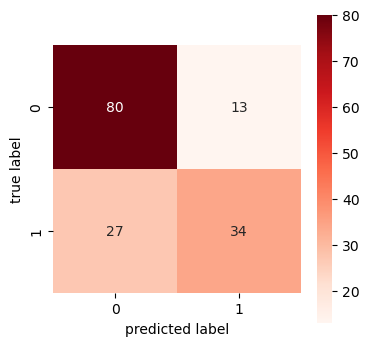

0.7402597402597403

In [161]:
plt.figure(figsize = (4,4)) 
sns.heatmap(cm,square=True, annot=True, cmap="Reds",)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
accuracy_score(y_test, y_pred)

In [164]:
pos_df.Tag.value_counts()

Tag
BI      449
MONO    320
Name: count, dtype: int64

In [ ]:
449/(449+320)
## BASELINE is 58.4%

0.5838751625487646

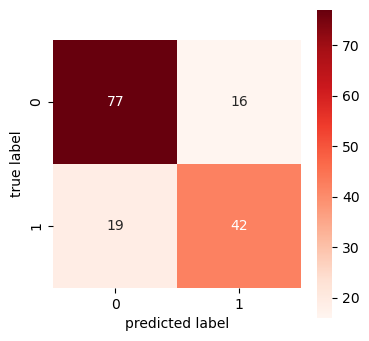

0.7727272727272727

In [166]:
docs_train, docs_test, y_train, y_test = train_test_split(pos_df.Text, pos_df.Tag, 
                                                          test_size = 0.20, random_state = 0)
vectorizer = TfidfVectorizer(lowercase = False, ngram_range=(1,2))
X_train = vectorizer.fit_transform(docs_train)
X_test = vectorizer.transform(docs_test)
nbmodel.fit(X_train, y_train)
y_pred = nbmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,4)) 
sns.heatmap(cm,square=True, annot=True, cmap="Reds",)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
accuracy_score(y_test, y_pred)

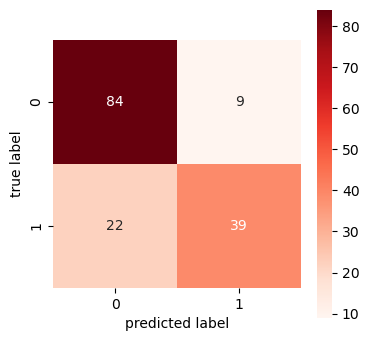

0.7987012987012987

In [167]:
docs_train, docs_test, y_train, y_test = train_test_split(pos_df.Text, pos_df.Tag, 
                                                          test_size = 0.20, random_state = 0)
vectorizer = TfidfVectorizer(lowercase = False, ngram_range=(1,3))
X_train = vectorizer.fit_transform(docs_train)
X_test = vectorizer.transform(docs_test)
nbmodel.fit(X_train, y_train)
y_pred = nbmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,4)) 
sns.heatmap(cm,square=True, annot=True, cmap="Reds",)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
accuracy_score(y_test, y_pred)

In [168]:
def print_top(vectorizer, clf, n):
    """Prints features with the highest log probability values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    class_labels = clf.classes_
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.feature_log_prob_[i])[0-n:][::-1]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '_') for j in top)))
print_top(vectorizer, nbmodel, 20)

BI: NOUN, DET, VERB, PROPN, DET_NOUN, ADP, CCONJ, AUX, INTJ, ADV, ADJ, VERB_DET, PUNCT, VERB_PROPN, ADP_DET, VERB_DET_NOUN, PROPN_VERB, VERB_ADP, DET_ADJ, ADJ_NOUN
MONO: INTJ, NOUN, DET, PRON, ADV, VERB, DET_NOUN, ADP, SYM, ADJ, PROPN, PUNCT, CCONJ, AUX, NOUN_VERB, ADP_DET, ADJ_NOUN, DET_ADJ, ADP_DET_NOUN, ADP_NOUN
